
# Investigation of No-show Appointments Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


The data includes some information about more than 100,000 Braxzilian medical appointments. It gives if the patient shows up or not for the appointment as well as some characteristics of patients and appointments. When we calculate overall no-show rate for all records, we see that it is pretty high; above 20%. It means more than one out of 5 patients does not show up at all. In this project, we specifically look at the associatons between no show-up rate and other variables and try to understand why the rate is at the level it is. 

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#  types and look for instances of missing or possibly errant data.
filename = 'noshowappointments-kagglev2-may-2016.csv'

df= pd.read_csv(filename)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()  # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The data gives information about gender and age of the patient, neighbourhood of the hospital, if the patient has hypertension, diabetes, alcoholism or not, date and time of appointment and schedule, if the patient is registered in scholarship or not, and if SMS received or not as a reminder. 

When I look at the data types of columns, it is realized that AppointmentDay and ScheduledDay are recorded as object, or string to be more specific. And also, PatientId is recorded as float instead of integer. But I most probably will not make use of this information since it is very specific to the patient.

The data seems pretty clear. There is no missing value or duplicated rows.

First, I start with creating a dummy variable for No-show variable. So it makes easier for us to look at no show rate across different groups.

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.isnull().any().sum()  # no missing value

0

In [6]:
df.duplicated().any()

False



### Data Cleaning 

A dummy variable named no_showup is created. It takes the value 1 if the patient did not show up, and 0 otherwise. I omitted PatientId, AppointmentID and No-show columns. 

There are some rows with Age value of -1 which does not make much sense. So I dropped these rows.

Other than that, the data seems pretty clean; no missing values, no duplicated rows. 

In [7]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [8]:
df['no_showup'] = np.where(df['No-show'] == 'Yes', 1, 0)

In [9]:
df.drop(['PatientId', 'AppointmentID', 'No-show'], axis = 1, inplace = True)

In [10]:
noshow = df.no_showup == 1
show = df.no_showup == 0

In [11]:
index = df[df.Age == -1].index
df.drop(index, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis


### What factors are important in predicting no-show rate?

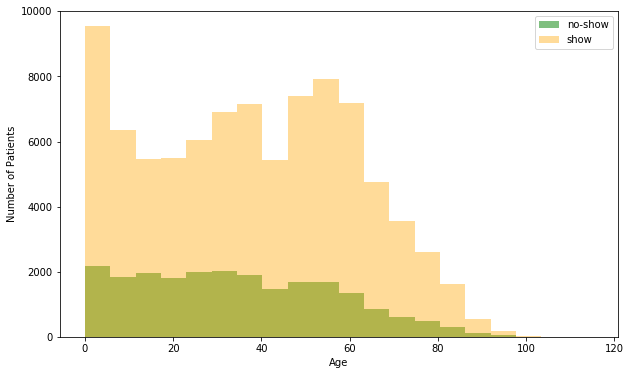

In [12]:
plt.figure(figsize = (10,6))
df.Age[noshow].plot(kind = 'hist', alpha= 0.5, color= 'green', bins =20, label = 'no-show');
df.Age[show].plot(kind = 'hist', alpha= 0.4, color= 'orange', bins =20, label = 'show');
plt.legend();
plt.xlabel('Age');
plt.ylabel('Number of Patients');

I started exploratory data analysis by first looking at the relationship between age and no_showup. By looking age distributions for patients who showed up and not showed up, we can not say much. There is a spike at around age 0, and no show up number is not that high compared to other ages. We can infer that adults are careful about babies' appointments. As age increases, the number of patients in both groups decreases, which is plausible taking general demographics into account. To be able to say more about showup rate across different age groups we need to look at ratio of one group to another.

First, I created age bins which are equally spaced from age 0 to the maximum age which is 115. It is called age_bins. Basically, it shows which bin the age of patient falls in. So I can look at the no_showup rate across different age bins.

In [13]:
bin_edges = np.arange(0, df.Age.max()+3, 3)
df['age_bins'] = pd.cut(df.Age, bin_edges)

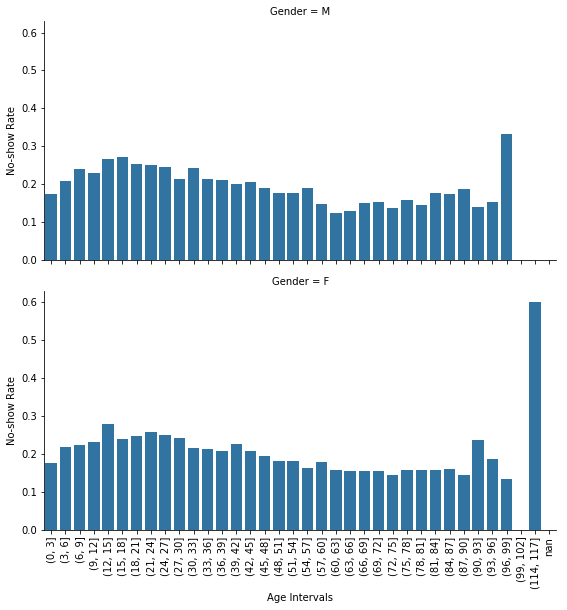

In [14]:
base_color = sb.color_palette()[0]
age_order = df.age_bins.unique().sort_values()
g= sb.FacetGrid(data= df, row= 'Gender', row_order = ['M', 'F'],  height=4, aspect = 2);
g = g.map(sb.barplot, 'age_bins', 'no_showup',  color = base_color, ci = None, order = age_order);
g.axes[0,0].set_ylabel('No-show Rate');
g.axes[1,0].set_ylabel('No-show Rate');
plt.xlabel('Age Intervals')
plt.xticks(rotation = 90);

No-show rate is smaller than average for babies ((0-3] interval). Then it increases as age get larger and it reaches peak at around 15-18 depending on gender. After that point, as age gets larger the no-show rate gets smaller. So middle-aged and old people are much more careful about their doctor appointments which is understandable as you get older, your health might not be in a good condition, you become more concerned about your health and do not miss your appointments. Or another explanation might be that as person ages, it is more probable to have a health condition which requires close doctor watch which incentivizes you attend to your scheduled appointments.

There are spikes at the end of graphs, I suspect this happens due to small number of patients in corresponding bins. 
There are only 5 people  in (114,117] bin which proves my suspicion right.

In [15]:
df.groupby('age_bins').size().sort_values().head(8)

age_bins
(105, 108]     0
(111, 114]     0
(102, 105]     0
(108, 111]     0
(114, 117]     5
(99, 102]      6
(96, 99]      18
(93, 96]      74
dtype: int64

In [16]:
df.groupby('Gender').no_showup.mean()

Gender
F    0.203149
M    0.199679
Name: no_showup, dtype: float64

There is no much difference across genders. No-show rates are close.

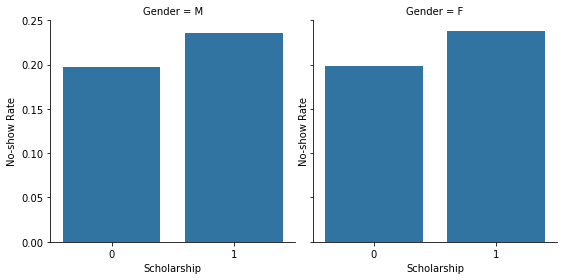

In [17]:
order_scholar = [0, 1]
g= sb.FacetGrid(data= df, col= 'Gender', col_order = ['M', 'F'],  height=4);
g = g.map(sb.barplot, 'Scholarship', 'no_showup',  order = order_scholar, color = base_color, ci = None,);
g.axes[0,0].set_ylabel('No-show Rate');
g.axes[0,1].set_ylabel('No-show Rate');

If the patient is in Brazilian welfare program, then the probability of her not showing up for the appointment is larger than the probablity of a patient which is not registered in welfare program. There is no significant difference between males and females. 

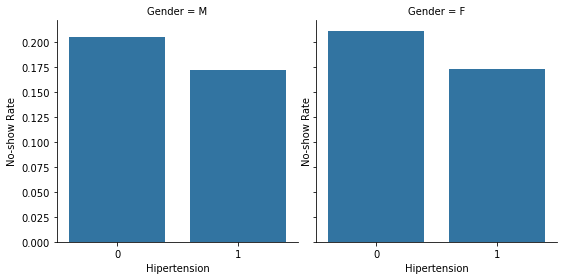

In [18]:
order_hyper = [0, 1]
g= sb.FacetGrid(data= df, col= 'Gender', col_order = ['M', 'F'],  height=4);
g = g.map(sb.barplot, 'Hipertension', 'no_showup', order = order_hyper, color = base_color, ci = None,);
g.axes[0,0].set_ylabel('No-show Rate');
g.axes[0,1].set_ylabel('No-show Rate');

When the patient has hypertension or diabetes, she would not want to miss doctor appointments. So having a disease to be watched closely incentivizes you to show up for your appointments. Again, being male or female does not make a significant difference in no-show rate.



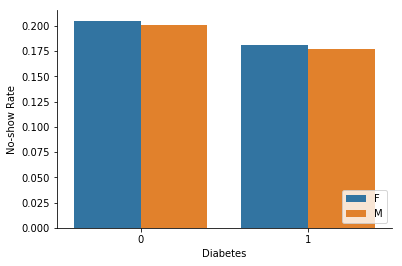

In [19]:
order_diabetes = [0, 1]
sb.barplot(data =df, x = 'Diabetes', y = 'no_showup', hue = 'Gender', ci = None, order = order_diabetes);
sb.despine();
plt.ylabel('No-show Rate');
plt.legend(loc = 'lower right');

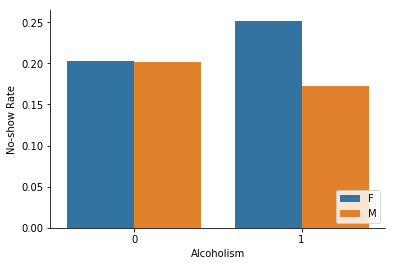

In [20]:
order_alcol = [0, 1]
sb.barplot(data =df, x = 'Alcoholism', y = 'no_showup', hue = 'Gender', ci = None, order = order_alcol);
sb.despine();
plt.ylabel('No-show Rate');
plt.legend(loc = 'lower right');

The story for alcoholism is a bit different. If the patient is a male with alcoholism, the probability of his no showing up is smaller than the one of male with no alcoholism. On the other hand, having alcoholism makes a female patient's probability of not showing up larger. Here I suspect if the number of females having alcoholism is very small or not, but I see below that the numbers in both groups are comparable.

In [21]:
df.groupby(['Gender', 'Alcoholism']).size()

Gender  Alcoholism
F       0             70616
        1              1223
M       0             36550
        1              2137
dtype: int64

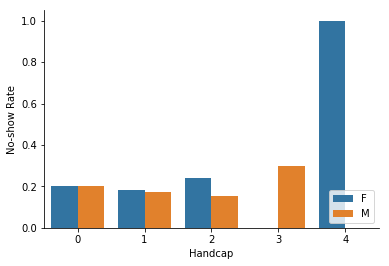

In [22]:
order_handcap = [0, 1, 2, 3, 4]
sb.barplot(data =df, x = 'Handcap', y = 'no_showup', hue = 'Gender', ci = None, order = order_handcap);
sb.despine();
plt.ylabel('No-show Rate');
plt.legend(loc = 'lower right');

In [23]:
df.groupby(['Handcap', 'Gender']).size()

Handcap  Gender
0        F         70549
         M         37736
1        F          1181
         M           861
2        F           105
         M            78
3        F             3
         M            10
4        F             1
         M             2
dtype: int64

We cannot see a significant difference across levels of Handcap variable. Label 4 for females is 1 but I do not pay attention to this since there are only 2 data points in this group. So being in different Handcap levels does not say much when predicting if a patient will show up.

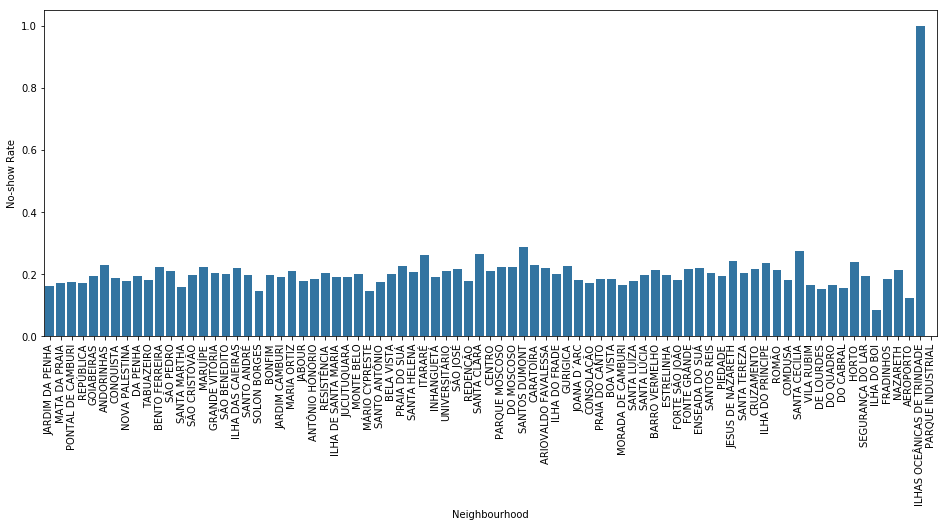

In [24]:
plt.figure(figsize = (16,6))
sb.barplot(data = df, x='Neighbourhood', y='no_showup', color =base_color, ci = None);
plt.xticks(rotation = 90);
plt.ylabel('No-show Rate');

In [25]:
df.groupby('Neighbourhood').size().sort_values(ascending = True).head(10)

Neighbourhood
PARQUE INDUSTRIAL                1
ILHAS OCEÂNICAS DE TRINDADE      2
AEROPORTO                        8
ILHA DO FRADE                   10
ILHA DO BOI                     35
PONTAL DE CAMBURI               69
MORADA DE CAMBURI               96
NAZARETH                       135
SEGURANÇA DO LAR               145
UNIVERSITÁRIO                  152
dtype: int64

I want to see no-show rate in different neighborhoods. There is no significant difference across neighborhoods except ILHAS OCEÂNICAS DE TRINDADE. There are only 2 data points from this place in the dataset. The exceptions can occur with only 2 data points. 
Lastly, I want to look at how sending SMS to patients to remind their appointments effects no-show rate. 

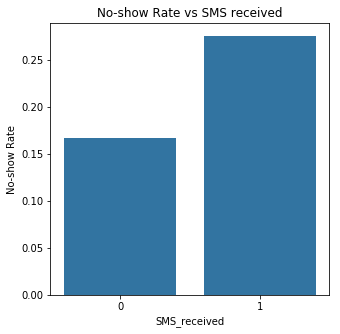

In [26]:
plt.figure(figsize = (5,5))
sb.barplot(data = df, x='SMS_received', y='no_showup', color =base_color, ci = None);
plt.title('No-show Rate vs SMS received');
plt.ylabel('No-show Rate');

The association between SMS_received variable and no-show rate is very counterintuitive. I expect that when the patient receives SMS as a reminder, she is more likely to go to the appointment. Here the graph says exact opposite thing; when no SMS, the rate is around 16% whereas when SMS received it is more than 27%. It needs further and deeper examination.

### Understanding Negative Association between No-show Rate and SMS_received Variable

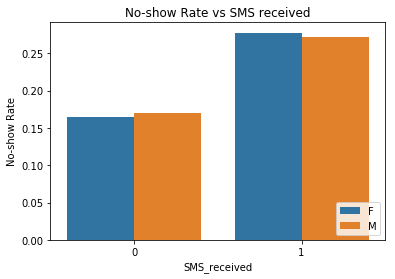

In [27]:
sb.barplot(data = df, x = 'SMS_received', y = 'no_showup', hue = 'Gender',  ci = None);
plt.title('No-show Rate vs SMS received');
plt.ylabel('No-show Rate');
plt.legend(loc ='lower right');

Gender does not make a significant impact on the rate with SMS and no SMS.

Below I try to look at how no-show rate changes with time to appointment day. I convert ScheduledDay and AppointmentDay to datetime. There is no information about hour in AppointmentDay variable. It includes 00:00:00 for all rows whereas ScheduledDay column includes hour information.

New variable named time_to_app represent time difference between AppointmentDay and ScheduledDay. It is supposed to be positive but because AppointmentDay includes 00:00:00 as hour for all appointments, time_to_app value is negative if both variables are on the same day. For example, if the patient schedules at 10 am for the appointment at 3pm the same day, time_to_app value for this appointment is (-1 days + 10 hours) since instead of 3 pm, midnight is recorded in AppointmentDay variable.

In [28]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [29]:
df['time_to_app']= df['AppointmentDay'] - df['ScheduledDay']

In [30]:
import datetime as dt
rows_to_drop = df[df.time_to_app < dt.timedelta(days = -1)].index
df.drop(rows_to_drop, inplace = True)

All time_to_app values smaller than 1 day are omitted since it points another error.

In [31]:
time_bins = [dt.timedelta(days=-1, hours= 0), dt.timedelta(days=-1, hours= 6), dt.timedelta(days=-1, hours= 12), dt.timedelta(days=-1, hours= 15),
             dt.timedelta(days=-1, hours = 18),
             dt.timedelta(days=1), dt.timedelta(days=2), dt.timedelta(days=3), dt.timedelta(days=7), dt.timedelta(days=15), 
             dt.timedelta(days=30), dt.timedelta(days=90), dt.timedelta(days=180)]
df['time_bins'] = pd.cut(df['time_to_app'], time_bins)

In [32]:
df.groupby('time_bins').size()

time_bins
(-1 days +00:00:00, -1 days +06:00:00]      356
(-1 days +06:00:00, -1 days +12:00:00]    11800
(-1 days +12:00:00, -1 days +15:00:00]    11049
(-1 days +15:00:00, -1 days +18:00:00]    15357
(-1 days +18:00:00, 1 days 00:00:00]       5213
(1 days 00:00:00, 2 days 00:00:00]         6725
(2 days 00:00:00, 3 days 00:00:00]         2737
(3 days 00:00:00, 7 days 00:00:00]        17510
(7 days 00:00:00, 15 days 00:00:00]       13528
(15 days 00:00:00, 30 days 00:00:00]      15868
(30 days 00:00:00, 90 days 00:00:00]      10161
(90 days 00:00:00, 180 days 00:00:00]       217
dtype: int64

I created bins for time_to_app variable. They are not equally spaced. I notice that there are significant number of patients in (-1 days, 0 days] bin. I partitioned it into smaller time bins to see the picture. The number of points in each bin is given above.

I group the data by time_bins and look at no-show rate. 

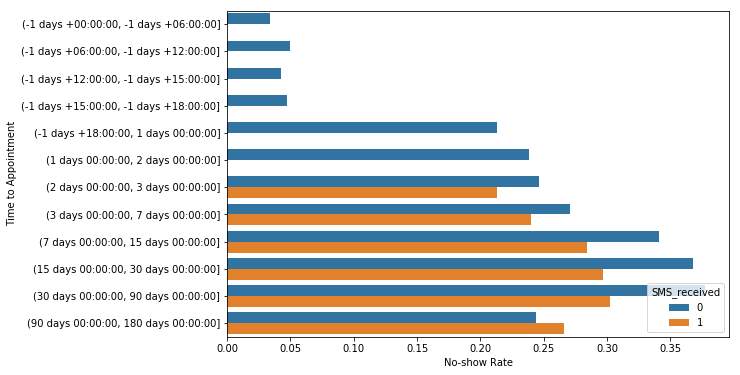

In [33]:
plt.figure(figsize =(9,6))
sb.barplot(data= df, y ='time_bins', x = 'no_showup', hue = 'SMS_received', ci = None);
plt.xlabel('No-show Rate');
plt.ylabel('Time to Appointment');

When patient schedules an appointment for the same day which represented by the first 4 upper rows in the graaph above, no-show rate is pretty smaller than  the average rate higher than 20%. If patients schedule an appointment for the same day (meaning patients make a schedule several hours before the appointment hour), with more than 95% probability they show up in the appointment. And unless there is more than 2 days to the appointment at the time the patient schedules the appointment, he does not receive SMS as a reminder. This explains why we see counterintuitive negative association between no-show rate and SMS_received variable. All patients schedule an appointment for the same day fall in no SMS received group with very low no-show rate and high number of patients and they pull down averall no-show rate of the group substantially. At the end, the rate for no SMS ends up much smaller than the rate for SMS getting  patients. 

We can see the effect of SMS on grouped data in the graph. SMS lowers no-show rate in every group including both 0 and 1 values for SMS_received variable. For instance, no-show rate when no SMS is a bit higher than 27% whereas it is 24% when SMS is sent for (3 days, 7 days) group. As time to appointment gets larger, SMS is being more effective. For example, SMS improves no-show rate by 3%, 5.5% and 7.7% when there are 3-7, 7-15, 30-90 days to appointment when it is scheduled, respectively.

We can see the overall effect of SMS on no-show rate by taking only those groups which have both SMS sent and no SMS sent patients. Excluding time bins smaller than 2 days, it is found that the rate is 0.33% with no SMS, and 28% with SMS sent.

But it is pretty interesting that patient attends appointment with high probability if it is the same day, and no-show rate jumps abruptly from below 5% to above 20% even if schedule day and appointment day are only 1 day apart. 

In [34]:
sms_sent = df[( df.AppointmentDay - df.ScheduledDay) >= dt.timedelta(days = 2) ]
sms_sent.groupby('SMS_received').no_showup.mean()

SMS_received
0    0.326949
1    0.275745
Name: no_showup, dtype: float64

<a id='conclusions'></a>
## Conclusions



-  If schedule day and appointment day are on the same day, the patient will show up with very high probability (higher than 95%). 

- This probability drops abruptly below 80% even when scheduled appointment is as early as tomorrow.

-  The probability of no showing up increases as appointment is scheduled for distant future than near future.

- No-show rate does not show significant difference across neighbourhoods.

-  Having hypertension and diabetes, being old, non-being registered in Brazilian welfare program and receving SMS as a reminder of appointment increases the probability of patient showing up for her scheduled appointment.

-  The effect of receiving SMS increases as the appointment is scheduled more in advance. 

